# OPIM 3511 HW6 - Spring 2022
# DUE: 4/25/2022 11:59PM

Download your HW as a .ipynb file, then submit it to HuskyCT.

When sharing the link, please make sure you change your setting to "anyone with link can view".

Please also help me to complete the SET survey at https://blueapp.grove.ad.uconn.edu/Blue/ (you will also receive a 1pt extra credit!) Thank you!

## Recall breast cancer dataset.

In [1]:
#import all your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# https://drive.google.com/file/d/1_aOwBsRfOpkSPp_5Zyi3829d-qZTCqwB/view?usp=sharing

# we can actually load this without mounting our google drive!
!gdown --id 1_aOwBsRfOpkSPp_5Zyi3829d-qZTCqwB #see the id of file?

# click the folder, this has downloaded the file to your local runtime!
# no need to mount your drive :)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_aOwBsRfOpkSPp_5Zyi3829d-qZTCqwB
To: /content/breastcancer.csv
100% 125k/125k [00:00<00:00, 65.2MB/s]


In [3]:
# now we can directly import it
df = pd.read_csv('breastcancer.csv')

The target variable will be `diagnosis`. Let's drop that last unnamed column while we are here. And since `id` doesn't have predictive power, let's drop that too.

In [4]:
# notice how we are dropping these columns INPLACE
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [5]:
# convert to binary variable - 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['diagnosis'] = LE.fit_transform(df['diagnosis'])

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## QUESTION A (KNN Classification)

Create & evaluate your KNN model for classification. Report the best k (i.e., number of neighbour) value.

In [7]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

In [8]:
X.shape

(569, 30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
k_range = range(1,20)
accuracy = []

for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  test_preds = knn.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, test_preds))

In [14]:
accuracy

[0.9370629370629371,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.958041958041958,
 0.958041958041958,
 0.9790209790209791,
 0.965034965034965,
 0.965034965034965,
 0.958041958041958,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.9790209790209791,
 0.9790209790209791]

In [15]:
k_final = 3

In [16]:
knn_final = KNeighborsClassifier(n_neighbors=k_final)
knn_final.fit(X_train, y_train)
test_preds_final = knn_final.predict(X_test)

In [17]:
confusion_matrix(y_test, test_preds_final)

array([[88,  1],
       [ 4, 50]])

In [18]:
print(classification_report(y_test, test_preds_final)) #actual, predict

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [19]:
# This model looks good with 97% accuracy

## QUESTION B (SVM)

Select 2~3 variables from your X in Question A and perform SVM classification.

In [20]:
from sklearn.svm import SVC


In [22]:
svm = SVC(kernel="poly") 
svm.fit(X_train, y_train)
test_preds = svm.predict(X_test)

In [23]:
# confusion matrix

confusion_matrix(y_test, test_preds)

array([[88,  1],
       [ 5, 49]])

In [24]:
# report
print(classification_report(y_test, test_preds)) #actual, predict

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        89
           1       0.98      0.91      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [25]:
#model is 96% accurate

## QUESTION C (Kmeans)

Use Kmeans to perform clustering on the first two principle components of your X in Question A.

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []

for i in range(1,11):
  kmeans_cur = KMeans(n_clusters=i, init = 'k-means++')
  kmeans_cur.fit(X)
  wcss.append(kmeans_cur.inertia_)

In [28]:
np.array(wcss).shape

(10,)

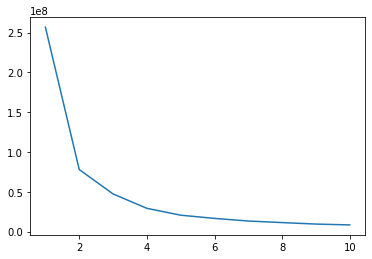

In [29]:
plt.plot(range(1,11), wcss)

In [30]:
kmeans_final = KMeans(n_clusters=4, init = 'k-means++')

In [31]:
pred_y = kmeans_final.fit_predict(X)

In [32]:
pred_y

array([2, 2, 2, 3, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 3, 3,
       0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0,
       0, 2, 3, 0, 3, 0, 3, 0, 3, 2, 0, 3, 2, 0, 3, 3, 3, 3, 0, 3, 0, 0,
       3, 3, 3, 3, 2, 3, 2, 0, 3, 0, 3, 2, 2, 3, 3, 3, 1, 2, 3, 2, 0, 2,
       3, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3,
       3, 3, 0, 3, 3, 3, 3, 0, 0, 2, 3, 2, 1, 0, 3, 0, 0, 2, 0, 2, 3, 0,
       0, 0, 2, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       0, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 0, 3, 2, 2, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 1, 2, 0, 3, 0, 3, 2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 2,
       2, 0, 3, 2, 2, 0, 3, 0, 3, 0, 3, 0, 2, 3, 1, 0, 0, 0, 3, 3, 2, 1,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 2, 3, 0, 1, 2, 0, 2, 0, 3,
       3, 0, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 1, 3, 0, 3, 3, 0, 3, 1, 3, 2, 3, 3, 2, 0, 0, 2, 3, 2, 0, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 2,

In [45]:
from sklearn.preprocessing import StandardScaler

iris_x_scaled = StandardScaler().fit_transform(X)
#must scale my data because PCA is effected by scale

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_x_scaled)

In [37]:
X_pca.shape

(569, 2)

In [46]:
kmeans_pca = KMeans(n_clusters=4, init = 'k-means++')
#using n_clusters=4, as beyond an x value of 4 in wcss plot, there is minimal change in y

In [42]:
pred_y_pca = kmeans_pca.fit_predict(X_pca)

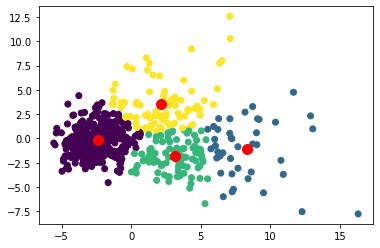

In [43]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = pred_y_pca)
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], s = 100, c='red')

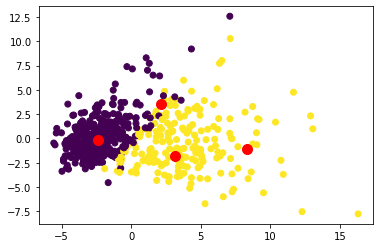

In [44]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = y)
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], s = 100, c='red')

Another reminder here (sorry for being annot:

Please help me to complete the SET survey at https://blueapp.grove.ad.uconn.edu/Blue/ (you will also receive a 1pt extra credit!) Thank you!